In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import openpyxl

Do the cleaning for text data

In [2]:
text_file_name = "osdg-community-data-v2024-04-01.csv"
text_df = pd.read_csv(text_file_name,sep = "\t",  quotechar='"')

In [3]:
text_df.drop(text_df.columns.values[0],axis = 1, inplace=True)
text_df = text_df.query("agreement > 0.5 and (labels_positive - labels_negative) > 2").reset_index(drop=True)

After cleaning the data, let's define the function:

In [4]:
def sdg_1 (corpus, stop_word): #take the document corpus and the stop word as parameters
    count_vectorizer = CountVectorizer(ngram_range = (2,2),stop_words=stop_word, min_df=5)
    count_vectorizer.fit(corpus)
    count_vector = count_vectorizer.transform(corpus).toarray() 
    
    count_vector_df = pd.DataFrame(count_vector, columns=count_vectorizer.get_feature_names_out())
    bigram_freq = pd.DataFrame({"term": count_vector_df.columns.values, "freq" : count_vector_df.sum(axis=0)})
    feature_names = count_vectorizer.get_feature_names_out()
    # Sum counts across all documents
    n_gram_counts = np.sum(count_vector, axis=0)
    
    # Create a list of (n-gram, count) pairs
    n_gram_freq = list(zip(feature_names, n_gram_counts))   
    # Sort by frequency in descending order
    sorted_n_grams = sorted(n_gram_freq, key=lambda x: x[1], reverse=True)
    top_50 = sorted_n_grams[:50]
    
    # Display the top 50 words
    for n_gram, freq in top_50:
        print(f"{n_gram}: {freq}") 
        
    top_50_frequencies = [freq for _, freq in sorted_n_grams[:50]]    
    cumulative_frequencies = np.cumsum(top_50_frequencies) #use np.cumsum to calculate the cumulative sums
    # the total word count
    total_word_count = np.sum(count_vector)
    
    # Calculate the percentage
    percentage = (cumulative_frequencies[-1] / total_word_count) * 100
    
    # Plot cumulative frequencies
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 51), cumulative_frequencies, marker='o', linestyle='-', color='b')
    plt.title("Cumulative Count of Top 50 Words")
    plt.xlabel("Word Rank")
    plt.ylabel("Cumulative Frequencies")
    plt.grid(True)
    plt.show()
    
    print(f"Percentage of total word count accounted for by the top 50 words: {percentage:.2f}%")   
    

human rights: 2003
climate change: 1361
et al: 1253
oecd countries: 951
developing countries: 895
health care: 888
united states: 833
long term: 798
international law: 779
labour market: 761
gender equality: 628
energy efficiency: 548
private sector: 535
renewable energy: 513
united nations: 497
climate finance: 489
sustainable development: 484
economic growth: 469
rural areas: 441
mental health: 423
decision making: 419
world bank: 418
rule law: 400
higher education: 392
land use: 390
labour force: 364
primary care: 361
united kingdom: 354
socio economic: 350
low income: 335
oecd average: 334
men women: 329
public health: 329
social protection: 328
supreme court: 313
developed countries: 312
women men: 312
percentage points: 310
protected areas: 304
public private: 299
urban areas: 294
economic social: 287
european union: 287
recent years: 285
civil society: 281
food security: 281
water resources: 279
secondary education: 276
criminal law: 275
national level: 274


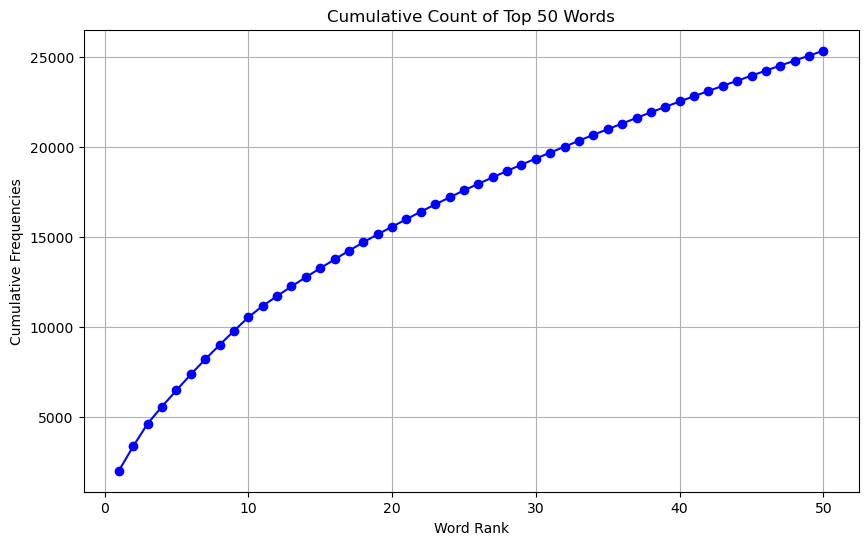

Percentage of total word count accounted for by the top 50 words: 6.97%


In [5]:
corpus = text_df.text
sdg_1(corpus, 'english')

In [6]:
sdg_1(corpus, None)

MemoryError: Unable to allocate 13.1 GiB for an array with shape (26526, 66469) and data type int64

Above are executions of the function on the whole corpus, the first with the removal of english stop words and the second one without by setting the stop_word parameter None.
The results of the first one show that the top 50 most frequent words take 6.97% of all words. The second one, without stop word removal, shows that it consumes too much memory space while there are too many documents.

Then, we are going to get the SDG 8 documents and run the function on them

In [7]:
sdg_8_docs = text_df[text_df['sdg'] == 8]['text']

labour market: 184
labour force: 89
young people: 75
foreign bom: 54
long term: 49
bom workers: 43
percentage points: 42
oecd countries: 41
economic growth: 40
et al: 38
social security: 36
job creation: 33
job search: 33
united states: 30
minimum wage: 29
unemployment rate: 29
force participation: 27
time work: 26
developing countries: 25
unemployment rates: 25
private sector: 24
unemployment insurance: 24
working age: 23
world bank: 23
rural areas: 21
short term: 21
south africa: 21
job quality: 20
relatively low: 20
social protection: 20
youth employment: 20
labour markets: 19
self employed: 19
tourism sector: 19
education training: 18
employment rate: 18
informal sector: 18
native born: 18
public sector: 18
longer term: 17
native bom: 17
short time: 17
social assistance: 17
youth unemployment: 17
employment rates: 16
formal sector: 16
men women: 16
decent work: 15
employed persons: 15
fixed term: 15


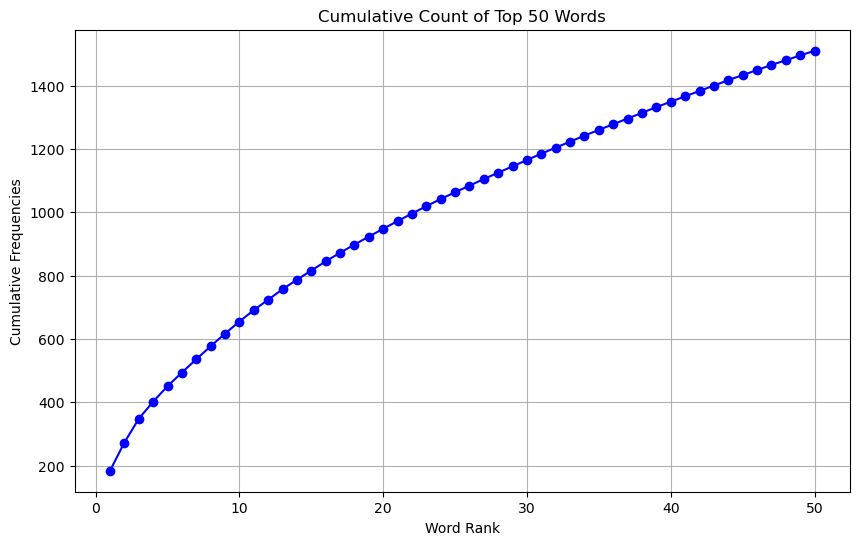

Percentage of total word count accounted for by the top 50 words: 39.68%


In [8]:
sdg_1(sdg_8_docs, "english")

of the: 706
in the: 614
to the: 271
and the: 216
on the: 187
labour market: 184
to be: 176
for the: 159
with the: 131
the labour: 122
by the: 114
such as: 109
at the: 106
number of: 101
it is: 94
share of: 93
labour force: 89
that the: 82
as the: 81
per cent: 81
has been: 80
from the: 79
young people: 75
likely to: 71
for example: 67
as well: 65
can be: 65
this is: 64
the same: 62
have been: 61
should be: 61
well as: 60
during the: 57
is the: 57
may be: 57
due to: 56
employment and: 56
in this: 56
the employment: 56
based on: 55
more than: 55
foreign bom: 54
access to: 49
long term: 49
the number: 49
the share: 49
workers in: 49
there is: 48
the oecd: 45
they are: 45


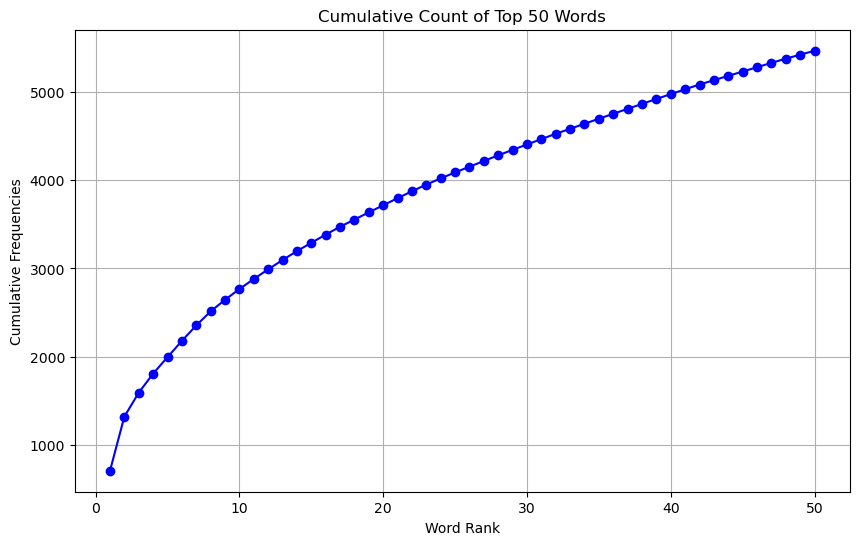

Percentage of total word count accounted for by the top 50 words: 19.86%


In [9]:
sdg_1(sdg_8_docs, None)

It shows that, with the stop word removal, the top 50 words take 39.86% and take 19.86% without the stop word removal. Since there are not that many SDG 8 documents, the function can run successfully.